In [1]:
import numpy as np
data = np.loadtxt("fnu.txt")
import math


In [25]:
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15

t_0 = data[:,0]
F_nu = data[:,1]

theta_0 = math.pi/18
E_52 = 80
n_0 = 1 
z = 1
theta_obs = 2*math.pi
theta_obs1 = theta_0
theta_obs2 = 2*theta_0
theta_obs3 = 3*theta_0
theta_obs4 = 5*theta_0
nu_0 = 1*pow(10,14)
D = Planck15.luminosity_distance(z=1).cgs.value

t_jet = 6.2*(1+z)*((E_52/n_0)**(1/3))*((theta_0/0.1)**(8/3))

gamma = (theta_0**(-1))*((t_0/t_jet)**(-1/2))   #equation for t_0 > t_jet
a = 1/((1+gamma**2)*(theta_obs**2))

a_theta = 1/((1+gamma**2)*(theta_obs1**2))
a_2theta = 1/((1+gamma**2)*(theta_obs2**2))
a_3theta = 1/((1+gamma**2)*(theta_obs3**2))
a_5theta = 1/((1+gamma**2)*(theta_obs4**2))


t_days = t_0/(86400)


[2.75605167e-32 1.20386857e-31 1.97014937e-31 ... 5.45420604e-37
 5.42792561e-37 5.40457096e-37]


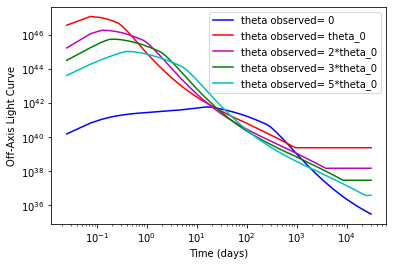

In [40]:
#The off-axis light curve with both the arbitrary frequency and time functions combined

def F(nu, t):
    
    Fnu_interp = np.interp(t, t_0, F_nu)
    
    Fnu_combined = (nu*Fnu_interp)/(nu_0)

    
    return Fnu_combined

Fnu_off = (a**3)*F(nu_0/a, a*t_0)

Fnu_off1 = (a_theta**3)*F(nu_0/a_theta, a_theta*t_0)
Fnu_off2 = (a_2theta**3)*F(nu_0/a_2theta, a_2theta*t_0)
Fnu_off3 = (a_3theta**3)*F(nu_0/a_3theta, a_3theta*t_0)
Fnu_off4 = (a_5theta**3)*F(nu_0/a_5theta, a_5theta*t_0)


L_off = 4*math.pi*(D**2)*nu_0*Fnu_off

L1_off = 4*math.pi*(D**2)*nu_0*Fnu_off1
L2_off = 4*math.pi*(D**2)*nu_0*Fnu_off2
L3_off = 4*math.pi*(D**2)*nu_0*Fnu_off3
L4_off = 4*math.pi*(D**2)*nu_0*Fnu_off4

print(Fnu_off)     #example

plt.plot(t_days, L_off, "b-", label='theta obs.= 0')
plt.plot(t_days, L1_off, "r-", label='theta obs.= theta_0')
plt.plot(t_days, L2_off, "m-", label='theta observed= 2*theta_0')
plt.plot(t_days, L3_off, "g-", label='theta observed= 3*theta_0')
plt.plot(t_days, L4_off, "c-", label='theta observed= 5*theta_0')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time (days)')
plt.ylabel('Off-Axis Light Curve')
plt.legend()